# Using titrationFitter
This notebook should guide you through the basic steps of the fitting of your titration.
## What is titrationFitter
titrationFitter is a very small python library designed to help you fit titration data. Because it is so small, it is also more flexible but it incumbs to the user to handle the inputs of their data.

## 1. Preparing your data

You will need to prepare 4 text files:
 - one containing the equivalents for each step of the titration 
 - another containing the cumulative volume of your titration
 - the actual spectra (e.g. UV-VIS)
 - an optional file containing labels for each wavelengths of the spectrum.
 
You can use a spreadsheet program to prepare the said files, and then save them to CSVs, preferably using the space character as the delimiter.

The UV-VIS spectrum file will look like this in the spreadsheet:
<img src="images_notebook/spreadsheet.png" style="width: 40em;"/>

The convention is **one column = one entire spectrum**, thus you will have as many columns as you have equivalent points. Once the file is saved to a CSV format, we have a text file looking like this:
<img src="images_notebook/textfile.png" style="width: 40em;"/>


The same format should be kept for the other files, except you will have only row or one column for each file since the rest of the information is 1D. See the files in the subdirectory _data_.

## 2. Loading your data

Now, we need to load our data onto the memory. We assume again that the files are in the subdirectory _data_. We will use the python library _numpy_ to take care of this task for us:

In [1]:
import numpy as np
# the subdirectory where our files are stored:
folder  = 'data/'
# ligand/metal ratios at the different points of the titration:
eqs     = np.loadtxt(folder+'eqs.csv')
# span of the UV-VIS spectrum: 
span    = np.loadtxt(folder+'span.csv')
# values of the UV-VIS spectrum: (contained by columns in the file)
uvs     = np.loadtxt(folder+'uvs.csv')
# and the volumes of our titration at each step:
volumes = np.loadtxt(folder+'volumes.csv')

## 3. (Optional) undersample our data
Often, spectrometers oversample the information by measuring (e.g. the transmission) at a large number of wavelengths. We can usually keep say 1 in 3 and still be fine. This will make the optimization much faster.
Once again, we use the power of numpy to keep only selected points from our total spectra:

In [2]:
# start at wavelength number 30, end at wavelength number 120
# and within these bounds, keep only one point in 2:
uvs     = uvs[30:120:2,:]
# same for the labels:
span    = span[30:120:2]

## 4. Preparing our model
Finally we start using the library. We import its components:

In [3]:
from titrationFitter import Component, System, Titration

We need to think about our model in advance and give the program a reasonable initial guess for the binding constants and the UV spectra of the components. Below I give such a guess for the system of this example, but keep in mind:

__From this point, the procedure is iterative__. 
You probably won't get it right the first time.

Let us define the building blocks of our titration: a metal, and a ligand:

In [4]:
# We are titrating with a colorless metal. Its uv-vis spectrum is then zero.
M    = Component(name='M', titrant=True,
                 uv_known=True,  uvvis=np.zeros_like(span))

# The compound being titrated is a ligand. Its UV-VIS is known: 
# it is that of the very beginning of the titration, normalised 
# by the concentration.
initial_concentration = 0.1 
L    = Component(name='L', conc_ini=initial_concentration,
                 uv_known=True,  uvvis=uvs[:,0]/initial_concentration) 

Then, we need to define the species that we suspect are being formed. This time, we will need not only to provide a guess for the spectra, but also for the binding constant.

Note aside, the initial guesses regarding the spectra are educated: they were infered from the conformations of the ligands as they bind to the metal.

In [5]:
# then we tell the program what composes "ML": one M and one L. 
# the UV spectrum is that of the very end of the titration.
# Since it is not known, it will be optimized by the program.
ML   = Component(eqconst=10**5,  conc_ini=0.,  
                 buildblocks=[M,L],  coeffs=[1,1], 
                 uv_known=False, uvvis=(uvs[:,-1])/initial_concentration/volumes[0]*volumes[-1],
                 eqconst_known=False)
# same as above, except we have 1 M and 2 L.
ML2  = Component(eqconst=10**8,  conc_ini=0.,  
                 buildblocks=[M,L],  coeffs=[1,2], 
                 uv_known=False, uvvis=(2*uvs[:,-1])/initial_concentration,
                 eqconst_known=False)
# same again, but with 1 M and 3 L.
ML3  = Component(eqconst=10**10.,  conc_ini=0.,  
                 buildblocks=[M,L],  coeffs=[1,3], 
                 uv_known=False, uvvis=(uvs[:,-1]+2*uvs[:,0])/initial_concentration,
                 eqconst_known=False)

# Finally we put everything together in a "system":
# the building blocks, the species, the initial concentration, and the labels.
S    = System([M, L], [ML, ML2, ML3], 
              conc_ini=initial_concentration, span=span)

# When we add the information about the steps (volume, equivalence),
# we obtain a titration:
T    = Titration(S, eqs[:15], uvs[:,:15], volumes=volumes[:15])

I think the above is pretty general, such that you can use it as a template for any titration that you might want to fit. 

## 5. Optimization
Now the optimization step:
(might take a while)

In [6]:
T.optimize()

Titration.optimize: array of length 138 to be optimized.
Current status:
############ binding constants:
ML:        10^5.000
ML2:       10^8.000
ML3:       10^10.000
############ final residuals:
1.344e-01
Current status:
############ binding constants:
ML:        10^5.000
ML2:       10^8.000
ML3:       10^10.000
############ final residuals:
1.344e-01
Current status:
############ binding constants:
ML:        10^5.000
ML2:       10^8.000
ML3:       10^10.000
############ final residuals:
1.344e-01
Current status:
############ binding constants:
ML:        10^5.000
ML2:       10^8.000
ML3:       10^10.000
############ final residuals:
1.344e-01
Current status:
############ binding constants:
ML:        10^5.000
ML2:       10^8.000
ML3:       10^10.000
############ final residuals:
1.344e-01
Current status:
############ binding constants:
ML:        10^5.000
ML2:       10^8.000
ML3:       10^10.000
############ final residuals:
1.344e-01
Current status:
############ binding constants:
M

/home/fred/.local/lib/python3.8/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


Current status:
############ binding constants:
ML:        10^5.085
ML2:       10^7.982
ML3:       10^10.090
############ final residuals:
7.907e-02
Current status:
############ binding constants:
ML:        10^5.085
ML2:       10^7.982
ML3:       10^10.090
############ final residuals:
7.907e-02
Current status:
############ binding constants:
ML:        10^5.085
ML2:       10^7.982
ML3:       10^10.090
############ final residuals:
7.907e-02
Current status:
############ binding constants:
ML:        10^5.085
ML2:       10^7.982
ML3:       10^10.090
############ final residuals:
7.907e-02
Current status:
############ binding constants:
ML:        10^5.085
ML2:       10^7.982
ML3:       10^10.090
############ final residuals:
7.907e-02
Current status:
############ binding constants:
ML:        10^5.085
ML2:       10^7.982
ML3:       10^10.090
############ final residuals:
7.907e-02
Current status:
############ binding constants:
ML:        10^5.085
ML2:       10^7.982
ML3:       10^10.0

/home/fred/.local/lib/python3.8/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


Current status:
############ binding constants:
ML:        10^5.211
ML2:       10^7.953
ML3:       10^10.090
############ final residuals:
2.151e-02
Current status:
############ binding constants:
ML:        10^5.211
ML2:       10^7.953
ML3:       10^10.090
############ final residuals:
2.151e-02
Current status:
############ binding constants:
ML:        10^5.211
ML2:       10^7.953
ML3:       10^10.090
############ final residuals:
2.151e-02
Current status:
############ binding constants:
ML:        10^5.211
ML2:       10^7.953
ML3:       10^10.090
############ final residuals:
2.151e-02
Current status:
############ binding constants:
ML:        10^5.211
ML2:       10^7.953
ML3:       10^10.090
############ final residuals:
2.151e-02
Current status:
############ binding constants:
ML:        10^5.211
ML2:       10^7.953
ML3:       10^10.090
############ final residuals:
2.151e-02
Current status:
############ binding constants:
ML:        10^5.211
ML2:       10^7.953
ML3:       10^10.0

Now we can plot and evaluate our model (drag the bar in the top left image to see the spectrum at different points of the titration)

<IPython.core.display.Javascript object>


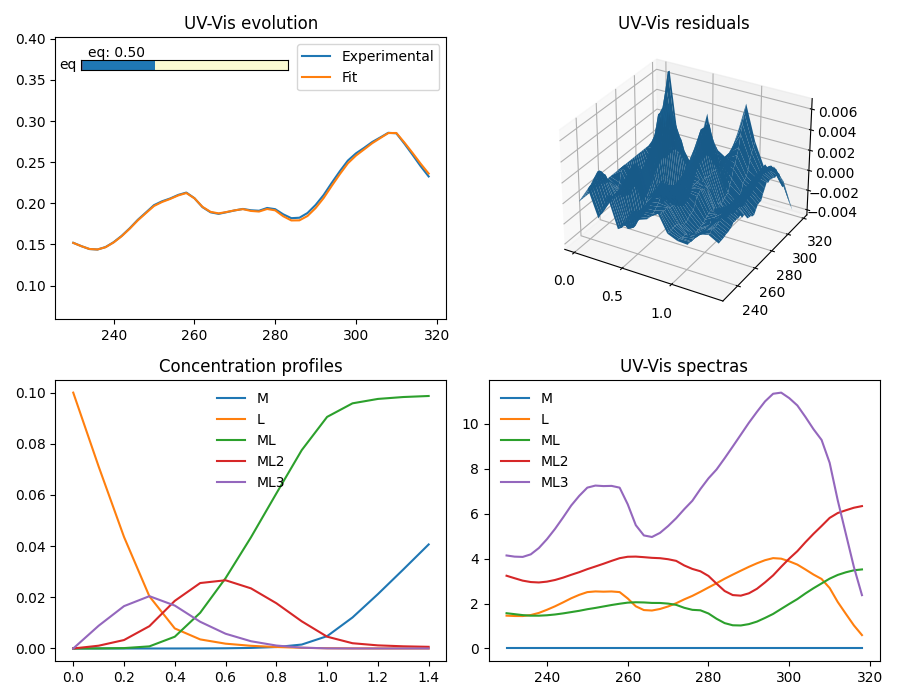

No handles with labels found to put in legend.
/home/fred/titration-fitting/titrationFitter/titrationFitter.py:590: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


In [7]:
# just some magic command to make the plot appear in this notebook:
%matplotlib notebook 
# the command triggering the plot of our titration:
T.plotCurrentModel()

Get the final coupling constant:

In [8]:
T.printCurrentModel()

############ binding constants:
ML:        10^5.279
ML2:       10^7.992
ML3:       10^10.053
############ final residuals:
2.012e-03


## 6. What are the errors on the determined coupling coefficients?
This is not implemented yet. The only method I can think of to reliably estimate a confidence interval would be a bootstrap. But that would be very expensive computationally.